# self analysis

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

**The issue is sns.load_dataset() only works with built-in seaborn datasets, not your custom CSV file.**

In [2]:
spoti =pd.read_csv('spotify_churn_dataset.csv') 

In [3]:
spoti.sample(100)

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
95,96,Other,51,IN,Student,222,97,0.03,Desktop,0,1,1
3447,3448,Female,40,DE,Premium,12,5,0.07,Desktop,0,1,0
4019,4020,Other,32,DE,Family,17,68,0.56,Desktop,0,1,0
2666,2667,Other,32,FR,Family,182,37,0.39,Desktop,0,1,1
6736,6737,Other,31,US,Family,139,5,0.50,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6899,6900,Female,54,AU,Family,16,14,0.59,Mobile,0,1,0
1174,1175,Male,41,DE,Free,272,59,0.53,Web,21,0,0
177,178,Male,18,PK,Family,219,54,0.06,Web,0,1,0
3463,3464,Male,49,PK,Family,54,56,0.39,Desktop,0,1,0


** but used in this ways **

<Axes: xlabel='gender', ylabel='age'>

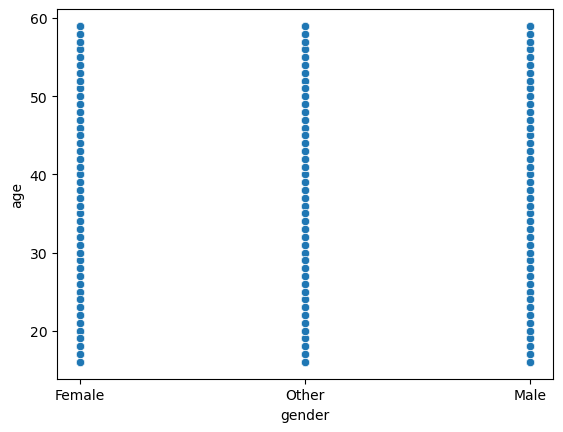

In [14]:
sns.scatterplot(x=spoti['gender'], y=spoti['age'])

In [6]:
spoti['gender'].value_counts()

gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64

# look carefully 
** all gender are very close to each other **  
that why is linear 


<Axes: xlabel='age', ylabel='listening_time'>

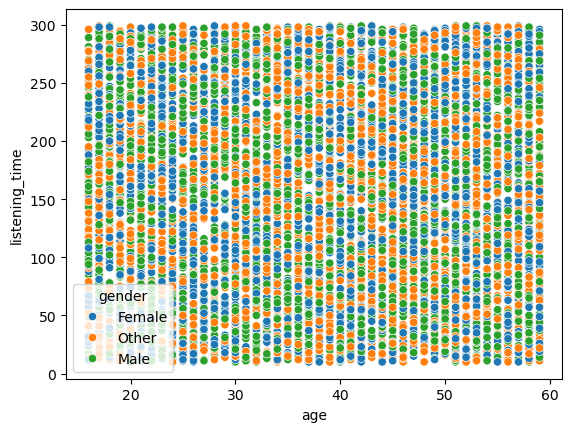

In [7]:
sns.scatterplot(data=spoti, x='age', y='listening_time',hue='gender')

# hexabin plot  
better use this

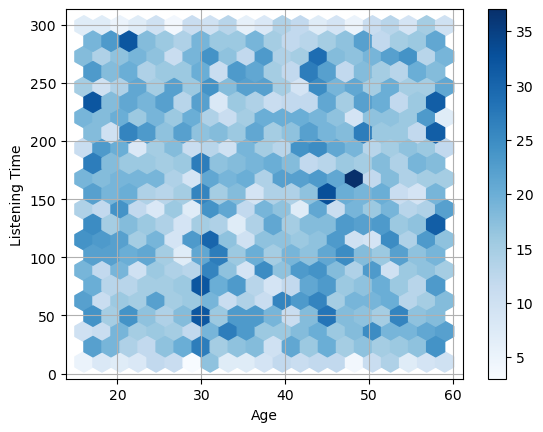

In [10]:
plt.hexbin(spoti['age'], spoti['listening_time'], gridsize=20, cmap='Blues')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Listening Time')
plt.grid()

# BarPlot (NUmerical- Categorical)

<Axes: xlabel='offline_listening', ylabel='subscription_type'>

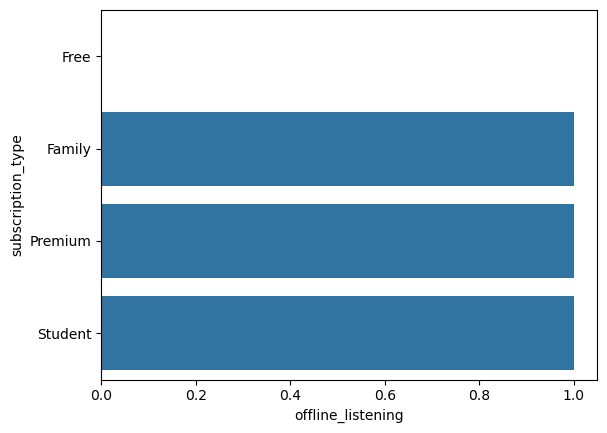

In [22]:
# sns.barplot(titanic['Pclass'],titanic['Age'],hue=titanic['Sex'])


sns.barplot(x=spoti['offline_listening'],y=spoti['subscription_type'],)

<Axes: xlabel='subscription_type', ylabel='listening_time'>

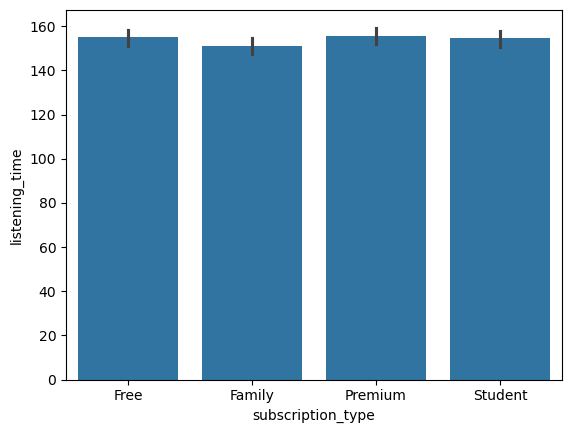

In [23]:
sns.barplot(data=spoti, x='subscription_type', y='listening_time')

i can't draw any data from it 


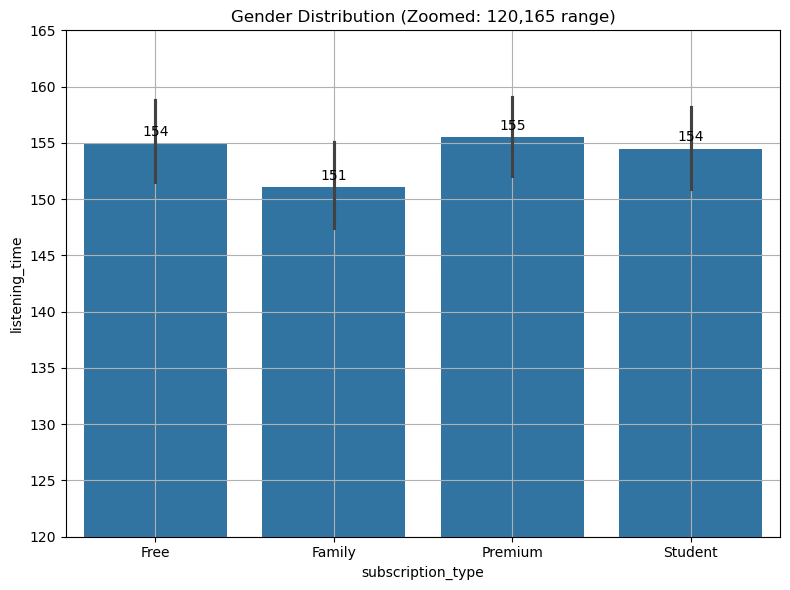

Exact gender counts are as follows:
gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64


In [26]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(data=spoti, x='subscription_type', y='listening_time')
ax.set_ylim(120,165)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Gender Distribution (Zoomed: 120,165 range)')
plt.tight_layout()
plt.grid()
plt.show()

print("Exact gender counts are as follows:")
print(spoti['gender'].value_counts())

<Axes: xlabel='device_type', ylabel='songs_played_per_day'>

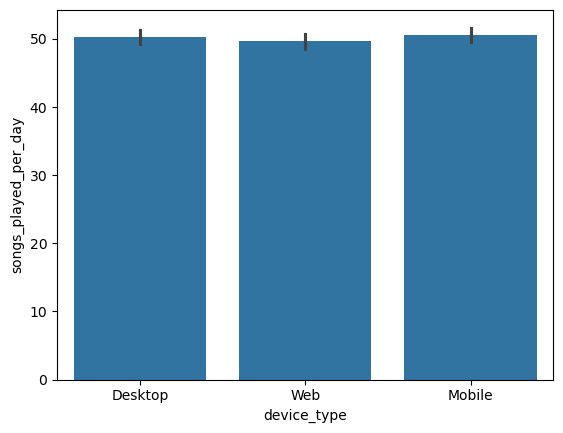

In [27]:
sns.barplot(data=spoti, x='device_type', y='songs_played_per_day')

In [ ]:






plt.figure(figsize=(8, 6))
ax=sns.barplot(data=spoti, x='device_type', y='songs_played_per_day')
ax.set_ylim(120,165)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Gender Distribution (Zoomed: 120,165 range)')
plt.tight_layout()
plt.grid()
plt.show()

print("Exact gender counts are as follows:")
print(spoti['gender'].value_counts())




